In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
import tensorflow as tf
from sklearn.utils import resample

In [2]:
rental_dataset = pd.read_csv("https://raw.githubusercontent.com/Capstone-Rental-Marketplace/SewaIn/main/Dataset/rental_dataset.csv")
rental_dataset

,id_user,id_rental,id_vehicle,rating,sum_day_of_rental,total_pay
0,162,43,MTR009,5,4,320000
1,1527,62,MTR0020,5,3,270000
2,10989,7,MBL0025,5,2,1600000
3,5908,119,MBL0026,5,2,800000
4,7730,80,MTR0010,5,4,1000000
...,...,...,...,...,...,...
14590,13880,91,MBL009,5,4,1600000
14591,2547,111,MTR003,4,3,390000
14592,6385,92,MTR0013,5,3,720000
14593,10382,25,MBL009,5,4,2000000


In [3]:
rental_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595 entries, 0 to 14594
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_user            14595 non-null  int64 
 1   id_rental          14595 non-null  int64 
 2   id_vehicle         14595 non-null  object
 3   rating             14595 non-null  int64 
 4   sum_day_of_rental  14595 non-null  int64 
 5   total_pay          14595 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 684.3+ KB


In [4]:
len(rental_dataset['id_user'].unique())

13895

In [5]:
rental_dataset['rating'].value_counts()


rating
5    9825
4    4553
3     146
2      45
1      26
Name: count, dtype: int64

In [6]:
user_dataset = pd.read_csv("https://raw.githubusercontent.com/Capstone-Rental-Marketplace/SewaIn/main/Dataset/user_dataset.csv")
user_dataset

,id_user,user_name,user_email
0,1,Abigail Davis,obriendaniel@gmail.com
1,2,Jason Wall,rothbryan@gmail.com
2,3,Trent Sandoval,trent.sandoval@gmail.com
3,4,Damaris Oneal,damaris.oneal@gmail.com
4,5,Kristin Morse,umorrison@gmail.com
...,...,...,...
13890,13891,muhammad andriansyah damanik,muhammadandriansyahdamanik@gmail.com
13891,13892,Susan Stewart,masontracy@gmail.com
13892,13893,Bria Spence,bria.spence@gmail.com
13893,13894,Elle Spears,elle.spears@gmail.com


In [7]:
shop_dataset = pd.read_csv("https://raw.githubusercontent.com/Capstone-Rental-Marketplace/SewaIn/main/Dataset/shop_dataset.csv")
shop_dataset

,id_rental,rental_name,vehicle_type,alamat,kabupaten/kota,kecamatan,no_hp,rating
0,1,My Bike Rental Bali (PT Trans Mina Mulia),Motor,"Jl. Raya Kaba-Kaba, Kaba-Kaba, Kec. Kediri, Ka...",Kabupaten Tabanan,Kec. Kediri,8.214656e+10,5
1,2,Rent Car Marga Dewata,Mobil,"Jl. Kebo Iwa Bongan No.19, Bongan, Puseh, Kabu...",Kabupaten Tabanan,Kec. Puseh,8.786550e+10,4.9
2,3,Trea Trans,Mobil,"Jl. Kresna 3 banjar pangkung No.25, Delod Peke...",Kabupaten Tabanan,Kec. Tabanan,8.898703e+10,5
3,4,Agas Motorbike Rental,Motor,"Pandak Gede, Kec. Kediri, Kabupaten Tabanan, B...",Kabupaten Tabanan,Kec. Kediri,8.579229e+10,5
4,5,HARYS Rent Car & Tour,Mobil,"Perumahan Graha Luhur Damai Blok Q.29, Pandak ...",Kabupaten Tabanan,Kec. Kediri,8.786556e+10,4.4
...,...,...,...,...,...,...,...,...
116,116,3 Monkeys Rental Bali,Mobil & Motor,"Jl. Kubu Gn. No.11, Dalung, Kec. Kuta Utara, K...",Kabupaten Badung,Kec. Kuta Utara,8.589999e+10,5
117,117,Persewaan Motor & Mobil( Duta Rent ),Mobil & Motor,"CFP2+WMQ, Jl. Pantai, Kp. Kusamba, Kec. Dawan,...",Kabupaten Klukung,Kec. Dawan,8.123458e+10,5
118,118,Rental scooter & car bali utara murah,Mobil,"Jl. Tunjung No.42, Kaliasem, Kec. Banjar, Kabu...",Kabupaten Buleleng,Kec. Banjar,8.133856e+10,5
119,119,"Scooter Rental, Bike Rental, Car Rental (Bangk...",Mobil & Motor,"Jl. Hanoman No.30, Ubud, Kecamatan Ubud, Kabup...",Kabupaten Gianyar,Kec. Ubud,8.234099e+10,4.7


In [8]:
shop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_rental       121 non-null    int64  
 1   rental_name     121 non-null    object 
 2   vehicle_type    121 non-null    object 
 3   alamat          121 non-null    object 
 4   kabupaten/kota  121 non-null    object 
 5   kecamatan       121 non-null    object 
 6   no_hp           121 non-null    float64
 7   rating          121 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.7+ KB


In [9]:
shop_dataset = shop_dataset.drop(columns={'rating', 'vehicle_type'})

In [10]:
vehicle_dataset = pd.read_csv("https://raw.githubusercontent.com/Capstone-Rental-Marketplace/SewaIn/main/Dataset/vehicle_dataset.csv")
vehicle_dataset

,id_vehicle,vehicle_name,engine_type,power,torque,colors,fuel_capacity,transmission,vehicle_type,number_of_seats,brand,model
0,MBL001,Suzuki Ertiga,1.5L VVT Petrol,103 hp,138 Nm,Black,45 liters,5-speed Manual / 4-speed Automatic,Mobil,7,Suzuki,Ertiga
1,MBL002,Suzuki Ertiga,1.5L VVT Petrol,103 hp,138 Nm,Silver,45 liters,5-speed Manual / 4-speed Automatic,Mobil,7,Suzuki,Ertiga
2,MBL003,Suzuki Ertiga,1.5L VVT Petrol,103 hp,138 Nm,White,45 liters,5-speed Manual / 4-speed Automatic,Mobil,7,Suzuki,Ertiga
3,MBL004,Honda Mobilio,1.5L i-VTEC Petrol,118 hp,145 Nm,Black,42 liters,6-speed Manual / CVT,Mobil,7,Honda,Mobilio
4,MBL005,Honda Mobilio,1.5L i-VTEC Petrol,118 hp,145 Nm,White,42 liters,6-speed Manual / CVT,Mobil,7,Honda,Mobilio
...,...,...,...,...,...,...,...,...,...,...,...,...
76,MTR0035,Yamaha NMAX,"Liquid-cooled, 4-stroke",15.1 hp,13.9 Nm,Black,7.1 liters,CVT,Motor,2,Yamaha,NMAX
77,MTR0036,Yamaha NMAX,"Liquid-cooled, 4-stroke",15.1 hp,13.9 Nm,Grey,7.1 liters,CVT,Motor,2,Yamaha,NMAX
78,MTR0037,Yamaha MT-25,"Liquid-cooled, 4-stroke",35.5 hp,23.6 Nm,White,14 liters,6-speed manual,Motor,2,Yamaha,MT-25
79,MTR0038,Yamaha MT-25,"Liquid-cooled, 4-stroke",35.5 hp,23.6 Nm,Black,14 liters,6-speed manual,Motor,2,Yamaha,MT-25


In [11]:
vehicle_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_vehicle       81 non-null     object
 1   vehicle_name     81 non-null     object
 2   engine_type      81 non-null     object
 3   power            81 non-null     object
 4   torque           81 non-null     object
 5   colors           81 non-null     object
 6   fuel_capacity    81 non-null     object
 7   transmission     81 non-null     object
 8   vehicle_type     81 non-null     object
 9   number_of_seats  81 non-null     int64 
 10  brand            81 non-null     object
 11  model            81 non-null     object
dtypes: int64(1), object(11)
memory usage: 7.7+ KB


In [12]:
ownership_dataset = pd.read_csv("https://raw.githubusercontent.com/Capstone-Rental-Marketplace/SewaIn/main/Dataset/ownership_rental_vehicle_dataset.csv")
ownership_dataset

,id_rental,id_vehicle,price_per_day,num_vehicle
0,58,MBL004,500000,3
1,9,MTR0032,100000,3
2,68,MBL0020,500000,3
3,54,MTR0018,110000,3
4,28,MBL0024,450000,4
...,...,...,...,...
4918,10,MTR0017,110000,3
4919,88,MBL004,350000,3
4920,104,MBL0024,450000,4
4921,97,MBL0032,800000,3


In [13]:
ownership_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_rental      4923 non-null   int64 
 1   id_vehicle     4923 non-null   object
 2   price_per_day  4923 non-null   int64 
 3   num_vehicle    4923 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 154.0+ KB


In [107]:

# Join data
data = user_dataset.merge(rental_dataset, on='id_user')
data = data.merge(shop_dataset, on='id_rental')
data = data.merge(ownership_dataset, on=['id_rental', 'id_vehicle'])
data = data.merge(vehicle_dataset, on='id_vehicle')



In [108]:
# Convert all columns to string
data['price_per_day'] = data['price_per_day'].astype(str)
data['num_vehicle'] = data['num_vehicle'].astype(str)
data['engine_type'] = data['engine_type'].astype(str)
data['power'] = data['power'].astype(str)
data['torque'] = data['torque'].astype(str)
data['colors'] = data['colors'].astype(str)
data['fuel_capacity'] = data['fuel_capacity'].astype(str)
data['transmission'] = data['transmission'].astype(str)
data['vehicle_type'] = data['vehicle_type'].astype(str)
data['number_of_seats'] = data['number_of_seats'].astype(str)
data['brand'] = data['brand'].astype(str)
data['model'] = data['model'].astype(str)
data['rental_name'] = data['rental_name'].astype(str)

# Combine the features into a single string column
#data['data_features'] = data['price_per_day'] + " " + data['engine_type'] + " " + data['power'] + " " + data['torque'] + " " + data['colors'] + " " + data['fuel_capacity'] + " " + data['transmission'] + " " + data['vehicle_type'] + " " + data['number_of_seats'] + " " + data['brand'] + " " + data['model'] + " " + data["rental_name"]
data['data_features'] = data['colors'] + " " + data['vehicle_type'] + " " + data['brand']
data = data[['id_user', 'id_rental', 'id_vehicle', 'rating', "data_features"]]
data.head()

,id_user,id_rental,id_vehicle,rating,data_features
0,1,74,MBL0031,5,Black Mobil Toyota
1,2924,74,MBL0031,5,Black Mobil Toyota
2,5737,74,MBL0031,4,Black Mobil Toyota
3,6010,74,MBL0031,5,Black Mobil Toyota
4,2324,58,MBL0031,4,Black Mobil Toyota


In [109]:
#data['data_features'] = data['data_features'].fillna('')
data['data_features'] = data['data_features'].str.split(' ')
# Remove duplicates
#data = data.drop_duplicates(subset='data_features')
#data['data_features'] = data['data_features'].fillna('')
# Apply one-hot encoding

data_features = data['data_features'].apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(int)

df_ratings_encode= pd.concat([data, data_features], axis=1)
df_ratings_encode.drop(columns=['data_features'],inplace=True)
df_ratings_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13804 entries, 0 to 13803
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_user     13804 non-null  int64 
 1   id_rental   13804 non-null  int64 
 2   id_vehicle  13804 non-null  object
 3   rating      13804 non-null  int64 
 4   Black       13804 non-null  int64 
 5   Mobil       13804 non-null  int64 
 6   Toyota      13804 non-null  int64 
 7   Honda       13804 non-null  int64 
 8   Silver      13804 non-null  int64 
 9   Daihatsu    13804 non-null  int64 
 10  Red         13804 non-null  int64 
 11  White       13804 non-null  int64 
 12  Suzuki      13804 non-null  int64 
 13  Nissan      13804 non-null  int64 
 14  Mitsubishi  13804 non-null  int64 
 15  Motor       13804 non-null  int64 
 16  Yamaha      13804 non-null  int64 
 17  Blue        13804 non-null  int64 
 18  Pink        13804 non-null  int64 
 19  Grey        13804 non-null  int64 
 20  Kawasa

In [110]:
df_ratings_encode.head()

,id_user,id_rental,id_vehicle,rating,Black,Mobil,Toyota,Honda,Silver,Daihatsu,...,Nissan,Mitsubishi,Motor,Yamaha,Blue,Pink,Grey,Kawasaki,Green,Yellow
0,1,74,MBL0031,5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2924,74,MBL0031,5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5737,74,MBL0031,4,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6010,74,MBL0031,5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2324,58,MBL0031,4,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df_user = df_ratings_encode.copy()
df_user.drop(columns=['id_rental','id_vehicle'],inplace=True)
df_user

,id_user,rating,Black,Mobil,Toyota,Honda,Silver,Daihatsu,Red,White,...,Nissan,Mitsubishi,Motor,Yamaha,Blue,Pink,Grey,Kawasaki,Green,Yellow
0,1,5,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2924,5,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5737,4,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6010,5,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2324,4,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13799,3273,5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
13800,7581,5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
13801,8887,4,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
13802,11705,5,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [112]:
for i in range(2, 21):
    feature_column = df_user.columns[i]
    df_user[feature_column] = df_user.apply(lambda row: row['rating'] if row[feature_column] == 1 else np.nan,axis=1)

df_user

,id_user,rating,Black,Mobil,Toyota,Honda,Silver,Daihatsu,Red,White,...,Nissan,Mitsubishi,Motor,Yamaha,Blue,Pink,Grey,Kawasaki,Green,Yellow
0,1,5,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2924,5,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5737,4,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6010,5,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2324,4,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13799,3273,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN
13800,7581,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN
13801,8887,4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN
13802,11705,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [113]:
num_user_columns = df_user.columns[2:]
num_item_columns = df_user.columns[2:]

In [114]:

df_user_avg = df_user.groupby('id_user')[num_user_columns].mean().reset_index()
df_user_avg.fillna(0,inplace=True)
df_user_avg

,id_user,Black,Mobil,Toyota,Honda,Silver,Daihatsu,Red,White,Suzuki,Nissan,Mitsubishi,Motor,Yamaha,Blue,Pink,Grey,Kawasaki,Green,Yellow
0,1,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13077,13891,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13078,13892,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
13079,13893,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13080,13894,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
df_user = pd.merge(df_user,df_user_avg,how='left',on='id_user')
df_user.drop(columns=df_user.columns[1:21],inplace=True)
df_user.columns = ['id_user'] + num_user_columns.tolist()
df_user

,id_user,Black,Mobil,Toyota,Honda,Silver,Daihatsu,Red,White,Suzuki,Nissan,Mitsubishi,Motor,Yamaha,Blue,Pink,Grey,Kawasaki,Green,Yellow
0,1,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2924,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5737,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6010,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2324,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13799,3273,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
13800,7581,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
13801,8887,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
13802,11705,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [116]:
df_item = df_ratings_encode.copy()
df_item.drop(columns=['id_user','id_rental'],inplace=True)
df_item.head()

,id_vehicle,rating,Black,Mobil,Toyota,Honda,Silver,Daihatsu,Red,White,...,Nissan,Mitsubishi,Motor,Yamaha,Blue,Pink,Grey,Kawasaki,Green,Yellow
0,MBL0031,5,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MBL0031,5,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,MBL0031,4,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,MBL0031,5,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,MBL0031,4,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
rating = df_ratings_encode['rating'].values

In [118]:
scaler_user = StandardScaler()
scaler_item = StandardScaler()

scaler_user.fit(df_user[num_user_columns])
scaler_item.fit(df_item[num_item_columns])

df_user[num_user_columns] = scaler_user.transform(df_user[num_user_columns])
df_item[num_item_columns] = scaler_item.transform(df_item[num_item_columns])

In [119]:
df_user.head()

,id_user,Black,Mobil,Toyota,Honda,Silver,Daihatsu,Red,White,Suzuki,Nissan,Mitsubishi,Motor,Yamaha,Blue,Pink,Grey,Kawasaki,Green,Yellow
0,1,1.507103,0.875846,1.939109,-0.693568,-0.373593,-0.317907,-0.446287,-0.705697,-0.228954,-0.221469,-0.329658,-0.795126,-0.4668,-0.201569,-0.137945,-0.107844,-0.172655,-0.093495,-0.103684
1,2924,1.507103,0.875846,1.939109,-0.693568,-0.373593,-0.317907,-0.446287,-0.705697,-0.228954,-0.221469,-0.329658,-0.795126,-0.4668,-0.201569,-0.137945,-0.107844,-0.172655,-0.093495,-0.103684
2,5737,1.060942,0.433614,1.439996,-0.693568,-0.373593,-0.317907,-0.446287,-0.705697,-0.228954,-0.221469,-0.329658,-0.795126,-0.4668,-0.201569,-0.137945,-0.107844,-0.172655,-0.093495,-0.103684
3,6010,1.507103,0.875846,1.939109,-0.693568,-0.373593,-0.317907,-0.446287,-0.705697,-0.228954,-0.221469,-0.329658,-0.795126,-0.4668,-0.201569,-0.137945,-0.107844,-0.172655,-0.093495,-0.103684
4,2324,1.060942,0.433614,1.439996,-0.693568,-0.373593,-0.317907,-0.446287,-0.705697,-0.228954,-0.221469,-0.329658,-0.795126,-0.4668,-0.201569,-0.137945,-0.107844,-0.172655,-0.093495,-0.103684


In [120]:
df_item.head()

,id_vehicle,rating,Black,Mobil,Toyota,Honda,Silver,Daihatsu,Red,White,...,Nissan,Mitsubishi,Motor,Yamaha,Blue,Pink,Grey,Kawasaki,Green,Yellow
0,MBL0031,5,1.42894,0.769517,1.858199,-0.669231,-0.359904,-0.307006,-0.430701,-0.681741,...,-0.21428,-0.319142,-0.769517,-0.452491,-0.194866,-0.132453,-0.104104,-0.166878,-0.090849,-0.100856
1,MBL0031,5,1.42894,0.769517,1.858199,-0.669231,-0.359904,-0.307006,-0.430701,-0.681741,...,-0.21428,-0.319142,-0.769517,-0.452491,-0.194866,-0.132453,-0.104104,-0.166878,-0.090849,-0.100856
2,MBL0031,4,1.42894,0.769517,1.858199,-0.669231,-0.359904,-0.307006,-0.430701,-0.681741,...,-0.21428,-0.319142,-0.769517,-0.452491,-0.194866,-0.132453,-0.104104,-0.166878,-0.090849,-0.100856
3,MBL0031,5,1.42894,0.769517,1.858199,-0.669231,-0.359904,-0.307006,-0.430701,-0.681741,...,-0.21428,-0.319142,-0.769517,-0.452491,-0.194866,-0.132453,-0.104104,-0.166878,-0.090849,-0.100856
4,MBL0031,4,1.42894,0.769517,1.858199,-0.669231,-0.359904,-0.307006,-0.430701,-0.681741,...,-0.21428,-0.319142,-0.769517,-0.452491,-0.194866,-0.132453,-0.104104,-0.166878,-0.090849,-0.100856


In [121]:
scaler = MinMaxScaler((-1,1))
scaler.fit(rating.reshape(-1,1))
rating = scaler.transform(rating.reshape(-1,1))
rating

array([[1. ],
       [1. ],
       [0.5],
       ...,
       [0.5],
       [1. ],
       [1. ]])

In [122]:
user_train, user_test, item_train, item_test, rating_train, rating_test = train_test_split(df_user[num_user_columns], df_item[num_item_columns], rating.flatten(), test_size=0.2, random_state=42)
user_test, user_val, item_test, item_val, rating_test, rating_val = train_test_split(user_test, item_test, rating_test, test_size=0.5, random_state=42)

user_train.shape, user_test.shape, user_val.shape, item_train.shape, item_test.shape, item_val.shape, rating_train.shape, rating_test.shape, rating_val.shape

((11043, 19),
 (1380, 19),
 (1381, 19),
 (11043, 19),
 (1380, 19),
 (1381, 19),
 (11043,),
 (1380,),
 (1381,))

In [125]:
# GRADED_CELL
# UNQ_C1
num_features = 19
user_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='linear'),


    ### END CODE HERE ###
])

item_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='linear'),



    ### END CODE HERE ###
])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_features, ))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 19)]                 0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 19)]                 0         []                            
                                                                                                  
 sequential_4 (Sequential)   (None, 32)                   42144     ['input_3[0][0]']             
                                                                                                  
 sequential_5 (Sequential)   (None, 32)                   42144     ['input_4[0][0]']             
                                                                                              

In [128]:
cost_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn, metrics=['mse'])

In [129]:
history = model.fit([user_train, item_train], rating_train, epochs=20, verbose=2, batch_size=256, validation_data=([user_val, item_val], rating_val))

Epoch 1/20
44/44 - 2s - loss: 0.0857 - mse: 0.0857 - val_loss: 0.0504 - val_mse: 0.0504 - 2s/epoch - 53ms/step
Epoch 2/20
44/44 - 0s - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0123 - val_mse: 0.0123 - 275ms/epoch - 6ms/step
Epoch 3/20
44/44 - 0s - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0114 - val_mse: 0.0114 - 294ms/epoch - 7ms/step
Epoch 4/20
44/44 - 0s - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0109 - val_mse: 0.0109 - 302ms/epoch - 7ms/step
Epoch 5/20
44/44 - 0s - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0118 - val_mse: 0.0118 - 300ms/epoch - 7ms/step
Epoch 6/20
44/44 - 0s - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0117 - val_mse: 0.0117 - 347ms/epoch - 8ms/step
Epoch 7/20
44/44 - 0s - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0112 - val_mse: 0.0112 - 354ms/epoch - 8ms/step
Epoch 8/20
44/44 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0112 - val_mse: 0.0112 - 321ms/epoch - 7ms/step
Epoch 9/20
44/44 - 0s - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0110 - val_mse: 0.0110 - 283ms/ep

In [138]:
new_user_id = 500000
new_black = 5
new_mobil = 0
new_toyota = 0
new_honda = 4
new_silver = 0
new_daihatsu = 0
new_red = 0
new_white = 0
new_suzuki = 0
new_nissan = 0
new_mitsubishi = 0
new_motor = 5
new_yamaha = 0
new_blue = 0
new_pink = 0
new_grey = 0
new_kawasaki = 0
new_green = 0
new_yellow = 0

new_user = pd.DataFrame([[new_user_id, new_black, new_mobil, new_toyota, new_honda, new_silver, new_daihatsu, new_red, new_white, new_suzuki, new_nissan, new_mitsubishi, new_motor, new_yamaha, new_blue, new_pink, new_grey, new_kawasaki, new_green, new_yellow]], columns=['id_user', 'Black', 'Mobil', 'Toyota', 'Honda', 'Silver', 'Daihatsu', 'Red', 'White', 'Suzuki', 'Nissan', 'Mitsubishi', 'Motor', 'Yamaha', 'Blue', 'Pink', 'Grey', 'Kawasaki', 'Green', 'Yellow'])
new_user

,id_user,Black,Mobil,Toyota,Honda,Silver,Daihatsu,Red,White,Suzuki,Nissan,Mitsubishi,Motor,Yamaha,Blue,Pink,Grey,Kawasaki,Green,Yellow
0,500000,5,0,0,4,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0


In [139]:
new_user[num_user_columns] = scaler_user.transform(new_user[num_user_columns])

new_user = np.tile(new_user[num_user_columns], (df_item.shape[0], 1))
new_user.shape

(13804, 19)

In [140]:
predictions = model.predict([new_user, df_item[num_item_columns]])

432/432 [==============================] - 1s 2ms/step


In [141]:
predictions = scaler.inverse_transform(predictions)
sorted_predictions = np.argsort(predictions, axis=0)[::-1].flatten()
sorted_item = rental_dataset.index.to_numpy()[sorted_predictions].flatten()
sorted_item

array([10680,  9981, 12278, ...,  5018,  5107,  7852])

In [142]:
dic_predictions = {
    'userId': np.full((df_item.shape[0],), new_user_id),
    'index': data.iloc[sorted_item].index,
    'predictions': predictions[sorted_predictions].flatten()
}
df_predictions = pd.DataFrame(dic_predictions)
df_predictions.set_index('index', inplace=True)
df_predictions = pd.merge(df_predictions, data, how='left', left_index=True, right_index=True).reset_index(drop=True)
df_predictions.drop_duplicates(subset=['id_vehicle'], inplace=True)
df_predictions.drop(columns=['id_user', 'rating'], inplace=True)
df_predictions.rename(columns={'id_user_x': 'id_user'}, inplace=True)
df_predictions.reset_index(drop=True,inplace=True)
df_predictions.head(10)

,userId,predictions,id_rental,id_vehicle,data_features
0,500000,4.843752,6,MTR0022,"[White, Motor, Honda]"
1,500000,4.843752,45,MTR0015,"[White, Motor, Honda]"
2,500000,4.843752,6,MTR004,"[White, Motor, Honda]"
3,500000,4.843752,62,MTR007,"[White, Motor, Honda]"
4,500000,4.843752,106,MTR0031,"[White, Motor, Honda]"
5,500000,4.843752,96,MTR0020,"[White, Motor, Honda]"
6,500000,4.833173,120,MTR0039,"[Red, Motor, Yamaha]"
7,500000,4.825689,81,MTR0011,"[Red, Motor, Kawasaki]"
8,500000,4.822908,99,MTR0010,"[Black, Motor, Kawasaki]"
9,500000,4.822310,78,MTR0013,"[Red, Motor, Honda]"


In [143]:
val_mse, val_loss = model.evaluate([user_val, item_val], rating_val, verbose=2)

44/44 - 0s - loss: 0.0083 - mse: 0.0083 - 115ms/epoch - 3ms/step


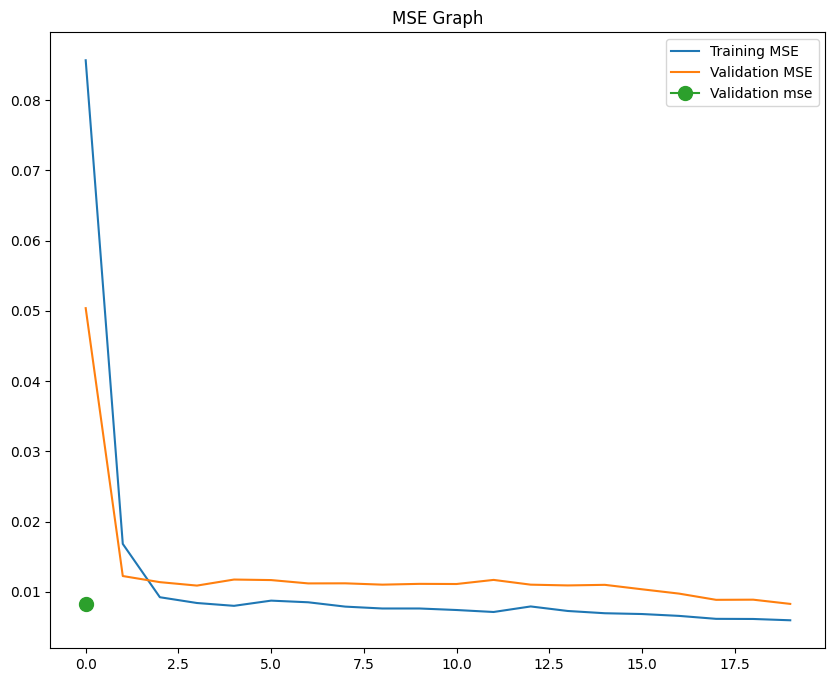

In [144]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.plot(val_mse, label='Validation mse', marker='o', markersize=10)
plt.legend()
plt.title('MSE Graph')
plt.show()